In [1]:
import numpy as np
import pandas as pd
from colorama import Fore, Back, Style
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        

/kaggle/input/jigsaw-toxic-comment-classification-challenge/train.csv.zip
/kaggle/input/jigsaw-toxic-comment-classification-challenge/sample_submission.csv.zip
/kaggle/input/jigsaw-toxic-comment-classification-challenge/test_labels.csv.zip
/kaggle/input/jigsaw-toxic-comment-classification-challenge/test.csv.zip


In [2]:
df = pd.read_csv("../input/jigsaw-toxic-comment-classification-challenge/train.csv.zip")

<center>
<div style = "background-color: rgba(152, 170, 236, 0.8); border-style: double;">
<strong style = "font-size: 25px; color:rgba(86, 106, 181, 1);"><center>Exploratory Data Analysis</center></strong>
</div>
</center>

There are several techniques to analyse data like classical analysis, exploratory data analysis and bayesian data analysis approach. We proceed with EDA in order to understand the structure of our data, is outliers, models and visualizations.

# Basic Datset Exploration and Structuring

In [3]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [4]:
df.shape

(159571, 8)

In [5]:
# Let's remove the unwanted columns like Comment ID before moving on to EDA
del df['id']

In [6]:
def colorToxicityValuesToRed(value):
    if value==0:
        color='green'
    elif value==1:
        color='red'
    else:
        color='black'
    return 'color: %s' % color
    




In [7]:
# Display the raw dataset in a visually appealing manner

display(df[100:106].style.applymap(colorToxicityValuesToRed,
subset=['toxic','severe_toxic','obscene','threat','insult','identity_hate']))

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
100,"However, the Moonlite edit noted by golden daph was me (on optus ...) Wake up wikkis. So funny",0,0,0,0,0,0
101,Check the following websites: http://www.iranchamber.com/personalities/farabi/farabi.php http://www.islam.org.br/%C2%A0al_farabi.htm http://www.superbeyin.com/sohbet/sohbet.htm,0,0,0,0,0,0
102,i can't believe no one has already put up this page Dilbert's Desktop Games so I did,0,0,0,0,0,0
103,""" Well, after I asked you to provide the diffs within one hour of your next edit here, you made an edit to your talk page here and then did not provide the diffs I requested within one hour of that edit. I then sanctioned you for failing to provide the requested diffs in a timely manner (which, after more than a week, you have still not done). Consequently, your request to lift the sanction is denied. """,0,0,0,0,0,0
104,"What page shoudld there be for important characters that DON'T reoccur? Void, Black Doom, Mephiles, etc",0,0,0,0,0,0
105,A pair of jew-hating weiner nazi schmucks.,1,0,1,0,1,1


In [8]:
# Perform a Descriptive Analysis on the Classification Classes

print(Back.WHITE+f"Percentage of Comments Classified as Toxic               "+Back.GREEN+f"{df['toxic'].sum()/1595.71}% \n")
print(Back.WHITE+f"Percentage of Comments Classified as Severe Toxic        "+Back.GREEN+f"{df['severe_toxic'].sum()/1595.71}% \n")
print(Back.WHITE+f"Percentage of Comments Classified as Obscene             "+Back.GREEN+f"{df['obscene'].sum()/1595.71}% \n")
print(Back.WHITE+f"Percentage  of Comments Classified as Threat              "+Back.GREEN+f"{df['threat'].sum()/1595.71}% \n")
print(Back.WHITE+f"Percentage of Comments Classified as Insult              "+Back.GREEN+f"{df['insult'].sum()/1595.71}% \n")
print(Back.WHITE+f"Percentage of Comments Classified as Identity Hate       "+Back.GREEN+f"{df['identity_hate'].sum()/1595.71}% \n")

Percentage of Comments Classified as Toxic               9.584448302009763% 

Percentage of Comments Classified as Severe Toxic        0.999555056996572% 

Percentage of Comments Classified as Obscene             5.2948217407925% 

Percentage  of Comments Classified as Threat              0.2995531769557125% 

Percentage of Comments Classified as Insult              4.936360616904074% 

Percentage of Comments Classified as Identity Hate       0.8804858025581089% 



# Text Counts & Lengths Analysis

In [9]:
import nltk
# Character counts
from nltk.tokenize import sent_tokenize
# Word counts
df["char_count"] = df["comment_text"].map(lambda x: len(x))
# Sentence counts
df["word_count"] = df["comment_text"].map(lambda x: len(x.split()))
# String counts
df["sent_count"] = df["comment_text"].map(lambda x: len(sent_tokenize(x)))
# Average word length
df["hashtag_count"] = df["comment_text"].map(lambda x: x.count("#"))
# Average sentence length
df["avg_word_len"] = df["comment_text"].map(lambda x: np.mean([len(w) for w in str(x).split()]))

df["avg_sent_len"] = df["comment_text"].map(lambda x: np.mean([len(w.split()) for w in sent_tokenize(x)]))

In [10]:
df.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,char_count,word_count,sent_count,hashtag_count,avg_word_len,avg_sent_len
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264,43,3,0,5.162791,14.333333
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112,17,4,0,5.588235,4.250000
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,233,42,3,0,4.571429,14.000000
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,622,113,4,1,4.486726,28.250000
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,67,13,2,0,4.230769,6.500000


In [11]:
df['comment_text'][0]

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

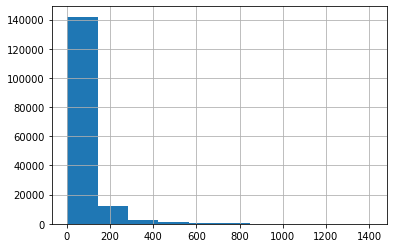

In [12]:
import matplotlib.pyplot as plt
df['word_count'].hist()
plt.show()
# Havent included others as there was no finding associated with the same

# Term Frequency Analysis

In [13]:
import re
import string

def clean_text(text):
    # Convert text to lowercase
    text = text.lower()    
    # Remove punctuation
    text = re.sub("[%s]" % re.escape(string.punctuation), "", text)   
     # Remove non-Roman characters
    text = re.sub("([^\x00-\x7F])+", " ", text)
    # Strip any numericals if present in words
    text =  re.sub(r'\d', '', text).strip()
    # strip any \n present between words
    text = re.sub(r'\n',' ',text).strip()
    #remove stop words 
    
    return text
df["comment_clean"] = df["comment_text"].map(lambda x: clean_text(x))

In [14]:
df["comment_text"][0]

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

In [15]:
df["comment_clean"][0]

'explanation why the edits made under my username hardcore metallica fan were reverted they werent vandalisms just closure on some gas after i voted at new york dolls fac and please dont remove the template from the talk page since im retired now'

<center>
<div style = "background-color: rgba(152, 170, 236, 0.8); border-style: double;">
<strong style = "font-size: 25px; color:rgba(86, 106, 181, 1);"><center>3. N-grams (combination of 1-,2-,3-grams)</center></strong>
</div>
</center>

In [16]:
# Made a corpus of vocabulary
from nltk.corpus import stopwords
stop = set(stopwords.words("english"))
corpus = [word for i in df["comment_clean"].str.split().values.tolist() for word in i if (word not in stop)]

In [17]:
corpus[0:20]

['explanation',
 'edits',
 'made',
 'username',
 'hardcore',
 'metallica',
 'fan',
 'reverted',
 'werent',
 'vandalisms',
 'closure',
 'gas',
 'voted',
 'new',
 'york',
 'dolls',
 'fac',
 'please',
 'dont',
 'remove']

In [18]:
# Obtain 20 most frequent words and plot them
from nltk.probability import FreqDist
most_common = FreqDist(corpus).most_common(20)
most_common

[('article', 55460),
 ('page', 45678),
 ('wikipedia', 35679),
 ('talk', 31652),
 ('please', 29619),
 ('would', 29213),
 ('one', 28104),
 ('like', 27710),
 ('dont', 25742),
 ('see', 21497),
 ('also', 20553),
 ('think', 20042),
 ('im', 19277),
 ('know', 18996),
 ('people', 17717),
 ('edit', 17598),
 ('articles', 17525),
 ('use', 16327),
 ('may', 15568),
 ('time', 15435)]

<AxesSubplot:>

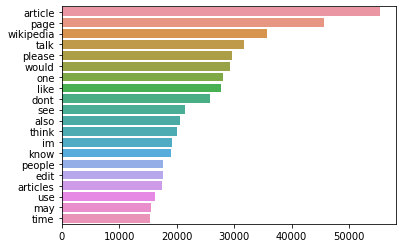

In [19]:
words, frequency = [], []
for word, count in most_common:
    words.append(word)
    frequency.append(count)
    
sns.barplot(x = frequency, y = words)

In [20]:
# Obtain 2-gram words
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer

list(ngrams(['I' ,'went','to','the','river','bank'],2))
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

In [21]:

top_n_bigrams=get_top_ngram(df['comment_clean'],2)[:20]
top_n_bigrams

[('of the', 50233),
 ('in the', 38312),
 ('to the', 26675),
 ('if you', 26409),
 ('on the', 23210),
 ('the article', 22585),
 ('it is', 21778),
 ('to be', 21358),
 ('you are', 17191),
 ('is not', 14782)]

<AxesSubplot:>

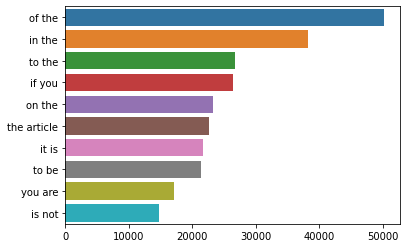

In [22]:
x,y=map(list,zip(*top_n_bigrams)) 
sns.barplot(x=y,y=x) 

In [23]:
# Obtain 3-gram words
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer

list(ngrams(['I' ,'went','to','the','river','bank'],3))
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

In [24]:
top_n_trigrams=get_top_ngram(df['comment_clean'],3)[:20]
top_n_trigrams

[('thank you for', 4018),
 ('if you have', 3552),
 ('my talk page', 3496),
 ('please do not', 3340),
 ('in the article', 3144),
 ('there is no', 3045),
 ('would like to', 2936),
 ('one of the', 2917),
 ('of the article', 2848),
 ('the talk page', 2551)]

<AxesSubplot:>

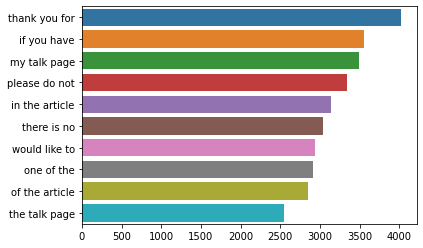

In [25]:
x,y=map(list,zip(*top_n_trigrams)) 
sns.barplot(x=y,y=x) 

<center>
<div style = "background-color: rgba(152, 170, 236, 0.8); border-style: double;">
<strong style = "font-size: 25px; color:rgba(86, 106, 181, 1);"><center>1. Dictionaries of toxic language</center></strong>
</div>
</center>

<center>
<div style = "background-color: rgba(152, 170, 236, 0.8); border-style: double;">
<strong style = "font-size: 25px; color:rgba(86, 106, 181, 1);"><center>2. Bag-of-Words with Elastic Net</center></strong>
</div>
</center>

<center>
<div style = "background-color: rgba(152, 170, 236, 0.8); border-style: double;">
<strong style = "font-size: 25px; color:rgba(86, 106, 181, 1);"><center>4. word2vec</center></strong>
</div>
</center>

<center>
<div style = "background-color: rgba(152, 170, 236, 0.8); border-style: double;">
<strong style = "font-size: 25px; color:rgba(86, 106, 181, 1);"><center>5. fastText</center></strong>
</div>
</center>

<center>
<div style = "background-color: rgba(152, 170, 236, 0.8); border-style: double;">
<strong style = "font-size: 25px; color:rgba(86, 106, 181, 1);"><center>6. not fine-tuned HateBERT</center></strong>
</div>
</center>

<center>
<div style = "background-color: rgba(152, 170, 236, 0.8); border-style: double;">
<strong style = "font-size: 25px; color:rgba(86, 106, 181, 1);"><center>7. fine-tuned HateBERT</center></strong>
</div>
</center>